# Suport Vector Machine (SVM)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

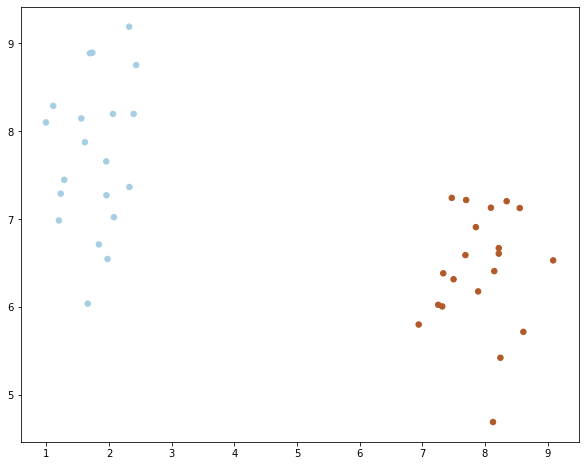

In [14]:
#we create 40 separable points
X, y = make_blobs(n_samples = 40, centers = 2, cluster_std=0.60, random_state =20)
# fit the svm model
clf = svm.SVC(kernel = 'linear', C = 1)
clf.fit(X, y)

# display the data points
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Paired)
plt.show()

In [15]:
# predicting for new data
newData = [[3, 4], [5, 6]]
clf.predict(newData)

array([0, 1])

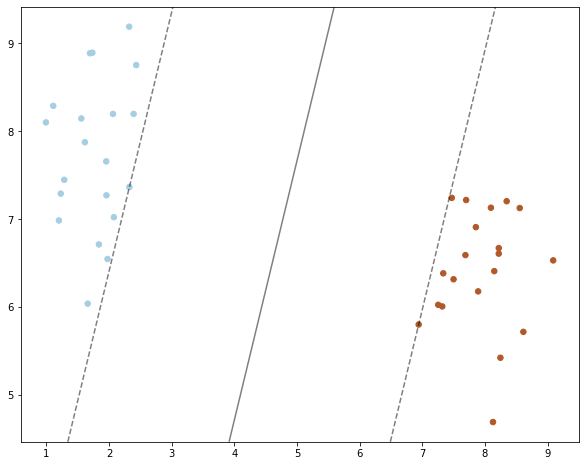

In [18]:
# we create 40 separable points
#X, y = make_blobs(n_samples = 40, centers = 2, cluster_std=0.60, random_state =20)
# fit the svm model
clf = svm.SVC(kernel = 'linear', C = 1000)
clf.fit(X, y)

# display the data points
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Paired)

#plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T 
Z = clf.decision_function(xy).reshape(XX.shape)

#plot decision boundary and margins
ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], 
           alpha = 0.5, linestyles = ['--', '-', '--'])

# plot suport vectors
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], 
           s= 100, linewidth = 1, facecolors = 'none')
plt.show()

## Another example with Cancer cell data

In [19]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [21]:
# load the data
cell_df = pd.read_csv("cell_samples.csv")
cell_df.head(10)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [22]:
cell_df.shape

(699, 11)

The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

Lets look at the distribution of the classes based on Clump thickness and Uniformity of cell size:

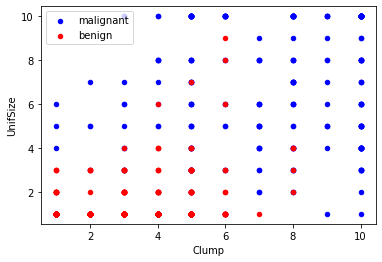

In [30]:
ax = cell_df[cell_df['Class'] == 4].plot(kind='scatter', x ='Clump', y = 'UnifSize', 
                                                color='b', label = 'malignant')

ax = cell_df[cell_df['Class'] == 2].plot(kind='scatter', x = 'Clump', y = 'UnifSize', 
                                                color = 'r', label = 'benign', ax = ax)
plt.show()

#### Data pre-processing and selection

In [31]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [40]:
# replace "?" to NaN
cell_df.replace("?", np.nan, inplace = True) 
cell_df.head()
 

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [41]:
cell_df.isna().sum()

ID              0
Clump           0
UnifSize        0
UnifShape       0
MargAdh         0
SingEpiSize     0
BareNuc        16
BlandChrom      0
NormNucl        0
Mit             0
Class           0
dtype: int64

In [45]:
mode_BareNuc = cell_df['BareNuc'].mode() 
print("Mode of BareNuc:", mode_BareNuc)

Mode of BareNuc: 0    1
dtype: object


In [46]:
cell_df['BareNuc'].replace(np.nan, 1, inplace=True)

In [47]:
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [50]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]])

In [51]:
y = np.asarray(cell_df['Class'])
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4,
       4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4,
       2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4,

In [52]:
#We split our dataset into train and test set:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (559, 9) (559,)
Test set: (140, 9) (140,)


#### Kernel function
The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

 - Linear
 - Polynomial
 - Radial basis function (RBF)
 - Sigmoid

Let's just use the default, RBF (Radial Basis Function) for this lab.

In [53]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [57]:
y_pred = clf.predict(X_test)
y_pred [0:5]

array([4, 2, 2, 4, 2])

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[87  1]
 [ 1 51]]


In [76]:
accuracy_percentage = 138/140
accuracy_percentage

0.9857142857142858

In [75]:
# Another method of evaluation
from sklearn import metrics
print("SMV's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

SMV's Accuracy:  0.9857142857142858


In [72]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.99      0.99      0.99        88
           4       0.98      0.98      0.98        52

    accuracy                           0.99       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140



In [73]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted') 

0.9857142857142858

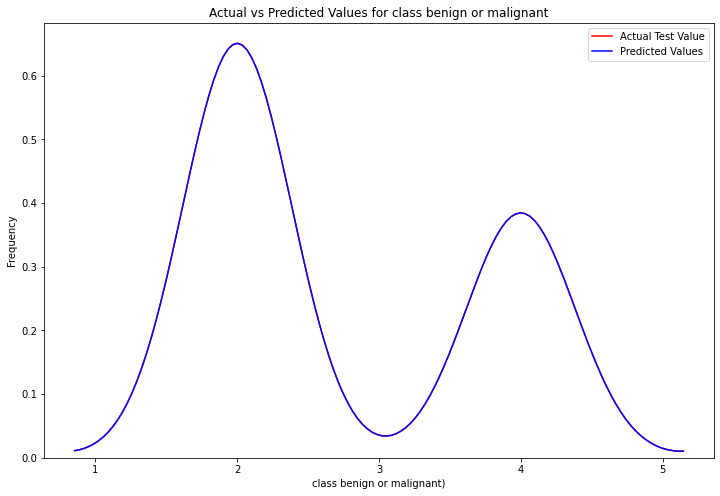

In [85]:
import seaborn as sns
# visualization with density plot
plt.figure(figsize=(12, 8))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Test Value")
ax1 = sns.distplot(y_pred, hist=False, color="b", label="Predicted Values")

plt.title('Actual vs Predicted Values for class benign or malignant') 
plt.xlabel('class benign or malignant') 
plt.ylabel('Frequency')
plt.show() 
plt.close()